In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

#https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data

In [2]:
# 1. feladat: Töltsed be az adatokat a csv fájból és jelenítsd meg az első öt sorát!

In [3]:
weather = pd.read_csv('weatherAUS.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#2 feladat: Listázd ki az oszlopok neveit!

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
null = pd.DataFrame({'Null Values' : weather.isna().sum(), 'Percentage Null Values' : (weather.isna().sum()) / (weather.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Date,0,0.000000
Location,0,0.000000
MinTemp,1485,1.020899
MaxTemp,1261,0.866905
Rainfall,3261,2.241853
Evaporation,62790,43.166506
Sunshine,69835,48.009762
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
WindDir9am,10566,7.263853


In [7]:
#3 feladat: Töröld azokat a sorokat, amelyekben a RainTomorrow oszlopban hiányzó adat van!

In [8]:
na_raintomorrow = weather.RainTomorrow.isna()
weather = weather[~na_raintomorrow]
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [9]:
#4 feladat: Nézd meg hogy az egyes oszlopok milyen típusú adatokat tartalmaznak!

In [10]:

weather.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [11]:
#5 feladat: Készíts három új oszlopot 'Day' 'Month' és 'Year' néven, amelyek az 'Date' oszlopban lévő adatokból nyerik ki a napot, a hónapot és az évet! (Tipp: használd a pandas to_datetime() függvényét!)

In [12]:
weather.insert(loc=0, column='Day', value=0)
weather.insert(loc=0, column='Month', value=0)
weather.insert(loc=0, column='Year', value=0)

In [13]:
weather['Year'] = pd.to_datetime(weather['Date']).dt.year
weather['Month'] = pd.to_datetime(weather['Date']).dt.month
weather['Day'] =  pd.to_datetime(weather['Date']).dt.day

In [14]:
#6 feladat: Távolítsd el az 'Date' oszlopot!

In [15]:
del weather['Date']

In [16]:
#7 feladat: Egy-egy listába gyüjtse a numerikus és kategorikus oszlopok neveit!

In [17]:
numeric_columns = weather.select_dtypes(include=['number']).columns.tolist()
non_numeric_columns = weather.select_dtypes(exclude=['number']).columns.tolist()


In [18]:
#8 feladat: Nézd meg hogy a 'Location' oszlopban milyen értékek szerepelnek és ezek hányszor fordulnak elő!

In [19]:
weather['Location'].value_counts()

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [20]:
#9 feladat: Készíts egy bar plotot a 'WindGustDir' oszlop értékeinek gyakoriságáról!

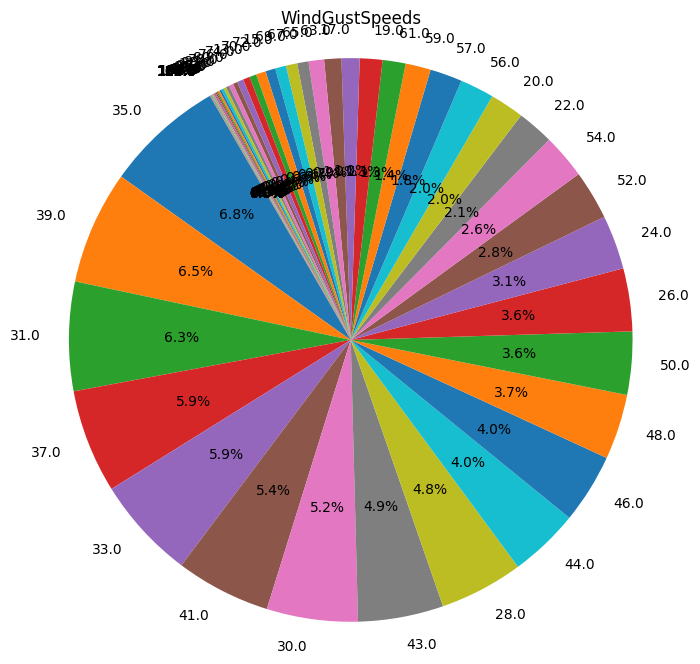

In [21]:
wgd_values = weather['WindGustSpeed'].value_counts().reset_index()
wgd_values.columns = ['WindGustSpeed','N']

plt.figure(figsize=(8, 8))
plt.pie(wgd_values['N'],labels=wgd_values['WindGustSpeed'], autopct='%1.1f%%', startangle=120)
plt.title('WindGustSpeeds')

plt.axis('equal') 
plt.show()

In [22]:
#10 feladat: Csinálj numerikus értékeket a kategorikus oszlopokból!

In [23]:
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    weather[column] = label_encoder.fit_transform(weather[column])



In [24]:
weather.head()

,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,1,2,13.4,22.9,0.6,NaN,NaN,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008,12,2,2,7.4,25.1,0.0,NaN,NaN,14,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008,12,3,2,12.9,25.7,0.0,NaN,NaN,15,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008,12,4,2,9.2,28.0,0.0,NaN,NaN,4,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008,12,5,2,17.5,32.3,1.0,NaN,NaN,13,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [25]:
#11 feladat: Nézd meg hogy a numerikus oszlopokban vannak-e hiányzó értékek!

In [49]:
null = pd.DataFrame({'Null Values' : weather.isna().sum(), 'Percentage Null Values' : (weather.isna().sum()) / (weather.shape[0]) * (100)})

null

,Null Values,Percentage Null Values
Year,0,0.0
Month,0,0.0
Day,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0


In [27]:
#12 feladat: Töltsd ki a hiányzó értékeket a numerikus oszlopokban az átlag értékekkel! (ellenőrizd le, hogy tényleg nincs-e több hiányzó érték!)

In [48]:
weather = weather.fillna(weather.mean())


In [29]:
#13 feladat: Nézd meg hogy a kategorikus oszlopokban vannak-e hiányzó értékek!

In [30]:
#a kategorikus oszlopok már numerikusak ekkor

In [31]:
#14 feladat: Nézd meg hogy korrelálnak egymással az egyes oszlopok! Ha ugy érzed valamelyik oszlop nem releváns, akkor töröld azt!

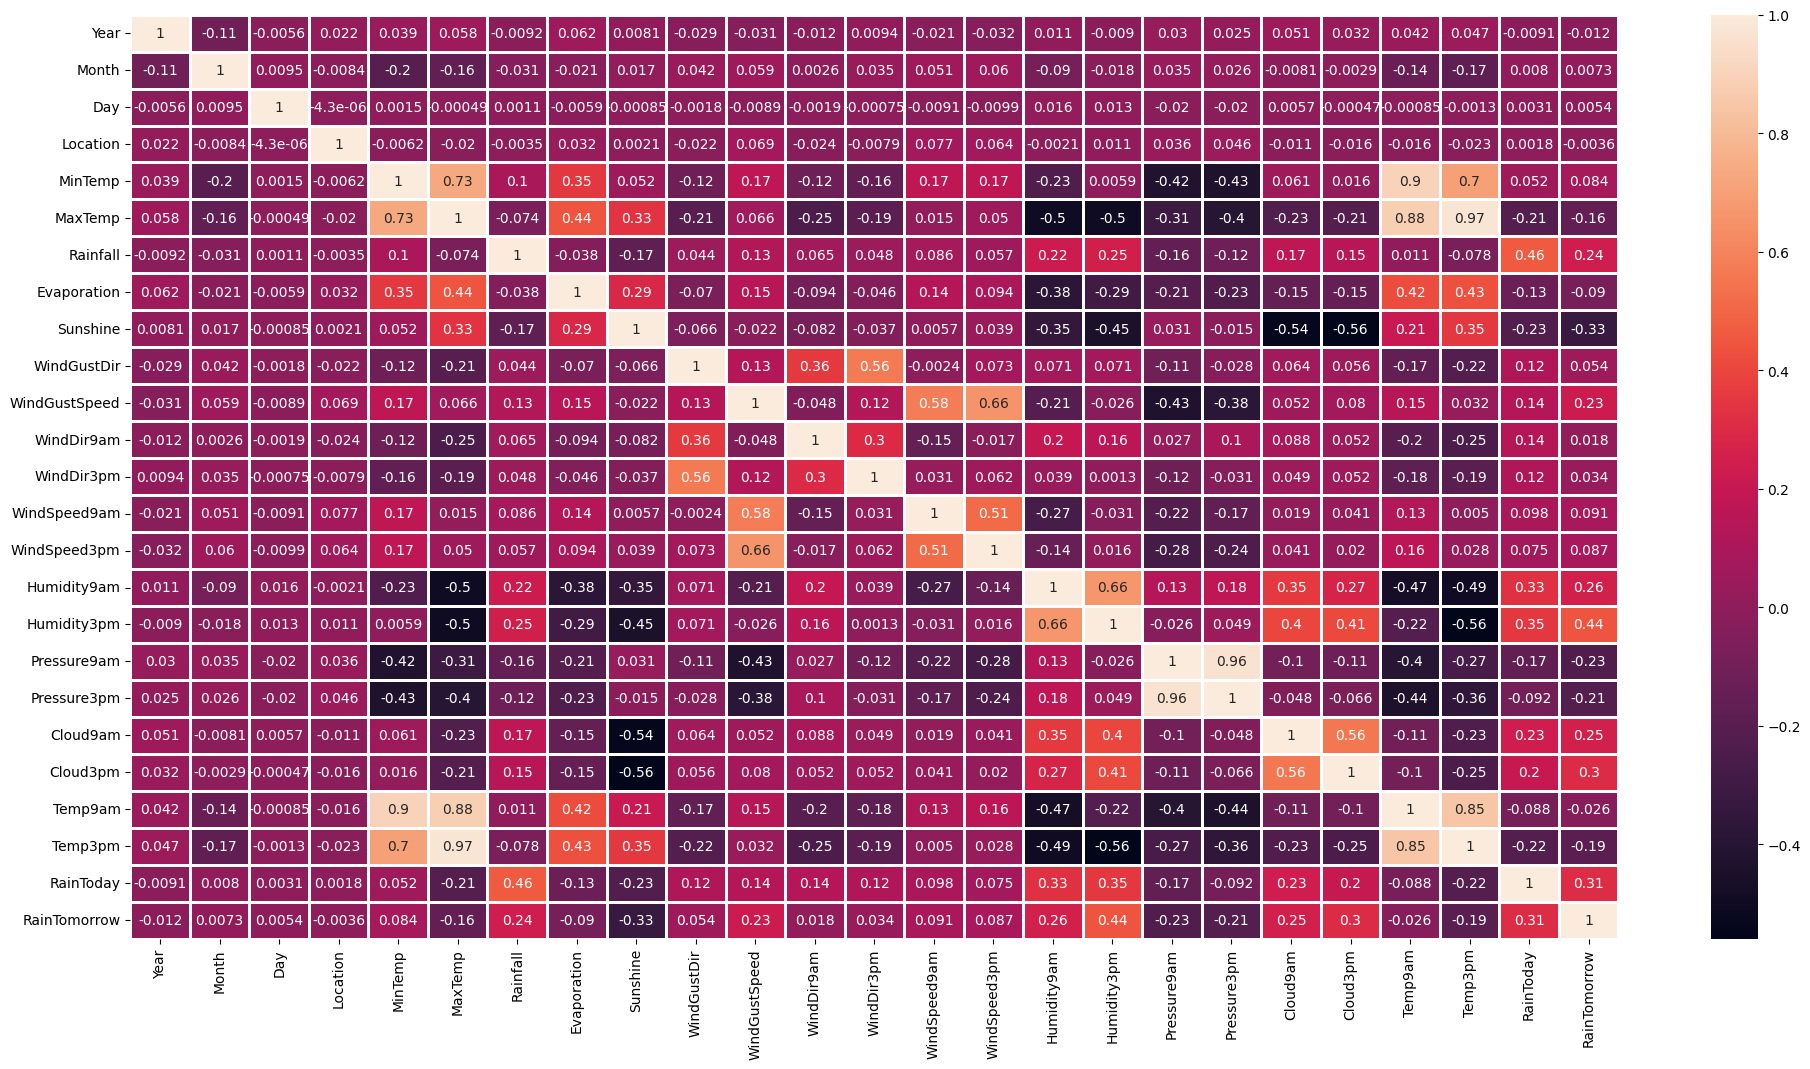

In [50]:
plt.figure(figsize=(24, 12))

corr = weather.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

In [32]:
#15 feladat: Válaszd szét az adatot X és y változókba, ahol az X az összes oszlop kivéve a 'RainTomorrow' oszlopot, a y pedig csak a 'RainTomorrow' oszlop legyen!

In [52]:
Y = weather['RainTomorrow']
X = weather.drop(['RainTomorrow'],axis=1)


In [33]:
#16 feladat: Válaszd szét az adatot tanító és tesztelő adatokra, ahol a tesztelő adatok mérete legyen 20%!

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((113754, 24), (113754,))

In [34]:
#17. feladat: Taníts egy Gradient Boosting classifiert az adatokon és nézd meg, hogy milyen pontosságot értél el! (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [55]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)

gbc.fit(X_train,y_train)

y_pred_gbc = gbc.predict(X_test)
acc_gbc = accuracy_score(y_test, y_pred_gbc)

print(F"Accuracy score of Gradient Boosting Classifier : {acc_gbc}")

Accuracy score of Gradient Boosting Classifier : 0.8476739688455993


In [35]:
#18 feladat: Készíts egy confusion matrixot a tesztelő adatokon és jelenítsd meg heatmap segítségével!

<Axes: >

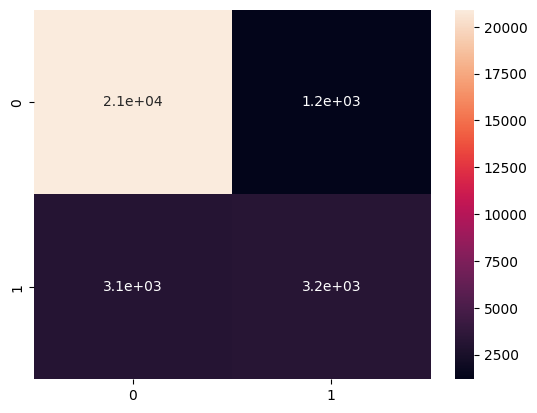

In [56]:
conf = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(conf,annot=True)